Column Names: ['Exp300', 'Exp303']
Dataframe loaded successfully.
Top X feature numbers calculated successfully.
Sets for Venn diagram created successfully.


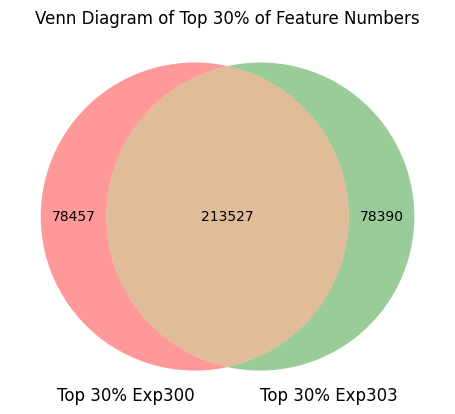

In [14]:
import traceback
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

def plot_top_X_venn(csv_file, column_names, X):
    try:
        # Read only necessary columns from the CSV file
        df = pd.read_csv(csv_file, usecols=['FeatureNum'] + column_names)
        print("Dataframe loaded successfully.")

        # Initialize a set to store top X% feature numbers
        top_X_feature_nums = set()
        
        # Find Feature Numbers in the top X% for each column
        for col in column_names:
            # Sort the column
            sorted_column = df.sort_values(by=col, ascending=False)
            # Calculate the threshold value for X% of the data
            threshold = sorted_column[col].quantile(1 - X/100)
            # Select the rows where the column value is greater than the threshold
            top_X_rows = sorted_column[sorted_column[col] > threshold]
            # Add the FeatureNums to the set
            top_X_feature_nums.update(top_X_rows['FeatureNum'])
        print("Top X feature numbers calculated successfully.")
        
        # Create sets for Venn diagram
        sets = []
        for col in column_names:
            sets.append(set(df[df[col] > df[col].quantile(1 - X/100)]['FeatureNum']))
        print("Sets for Venn diagram created successfully.")
        
        # Plot Venn diagram
        plt.figure()
        venn_diagram = venn2(sets, set_labels=('Top {}% {}'.format(X, column_names[0]), 'Top {}% {}'.format(X, column_names[1])))
        plt.title('Venn Diagram of Top {}% of Feature Numbers'.format(X))

        plt.show()
    except Exception as e:
        print("An error occurred:", e)
        print(traceback.format_exc())

# Implementation:
# csv_file_path = "/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/Protein_Comparison/Exp300v303/Exp_300_303_MedredCombined.csv"
# column_names = ['Exp300', 'Exp303']  # Input column names
# Implementation:
csv_file_path = "/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/Protein_Comparison/NOD1_analysis/Exp_300_303_304_MedredCombined.csv"
column_names = ['Exp300', 'Exp303']  # Input column names
X = 30  # Input desired top percentage

print("Column Names:", column_names)
plot_top_X_venn(csv_file_path, column_names, X)


Column Names: ['N_2', 'N_3']
Dataframe loaded successfully.
Overlap: 64.21%
Unique to N_2: 17.92%
Unique to N_3: 17.87%


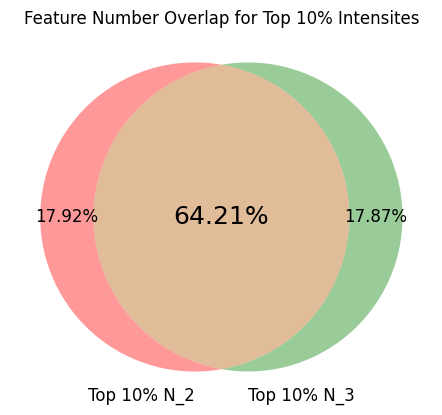

In [30]:
def plot_top_X_venn(csv_file, column_names, X):
    try:
        # Read only necessary columns from the CSV file
        df = pd.read_csv(csv_file, usecols=['FeatureNum'] + column_names)
        print("Dataframe loaded successfully.")

        # Create sets for Venn diagram
        sets = []
        for col in column_names:
            # Select the rows where the column value is in the top X%
            threshold = df[col].quantile(1 - X / 100)
            top_features = set(df[df[col] > threshold]['FeatureNum'])
            sets.append(top_features)
        
        # Calculate the overlap and unique percentages
        set1, set2 = sets
        total_features = len(set1.union(set2))  # Total unique features in the top X% combined
        overlap = set1.intersection(set2)
        unique_set1 = set1 - set2
        unique_set2 = set2 - set1

        overlap_percent = (len(overlap) / total_features) * 100
        unique_set1_percent = (len(unique_set1) / total_features) * 100
        unique_set2_percent = (len(unique_set2) / total_features) * 100

        print(f"Overlap: {overlap_percent:.2f}%")
        print(f"Unique to {column_names[0]}: {unique_set1_percent:.2f}%")
        print(f"Unique to {column_names[1]}: {unique_set2_percent:.2f}%")

        # Plot Venn diagram
        plt.figure()
        venn_diagram = venn2(
            [set1, set2],
            set_labels=(f'Top {X}% {column_names[0]}', f'Top {X}% {column_names[1]}')
        )
        
        # Update labels to display percentages
        if venn_diagram.get_label_by_id('10'):
            venn_diagram.get_label_by_id('10').set_text(f"{unique_set1_percent:.2f}%")
            venn_diagram.get_label_by_id('10').set_fontsize(12) 
        if venn_diagram.get_label_by_id('01'):
            venn_diagram.get_label_by_id('01').set_text(f"{unique_set2_percent:.2f}%")
            venn_diagram.get_label_by_id('01').set_fontsize(12) 
        if venn_diagram.get_label_by_id('11'):
            venn_diagram.get_label_by_id('11').set_text(f"{overlap_percent:.2f}%")
            venn_diagram.get_label_by_id('11').set_fontsize(18) 
        
        plt.title(f'Feature Number Overlap for Top {X}% Intensites')
        plt.show()
        
    except Exception as e:
        print("An error occurred:", e)
        print(traceback.format_exc())

# Implementation:
csv_file_path = "/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/Protein_Comparison/NOD2_comparisons_TEMPORARY_DELETE.csv"
column_names = ['N_2', 'N_3']  # Input column names
X = 10  # Input desired top percentage

print("Column Names:", column_names)
plot_top_X_venn(csv_file_path, column_names, X)


Column Names: ['Exp303', 'Exp304']
Dataframe loaded successfully.
Spearman Rank Correlation between Exp303 and Exp304:
  Correlation: 0.6315
  P-value: 0.0000


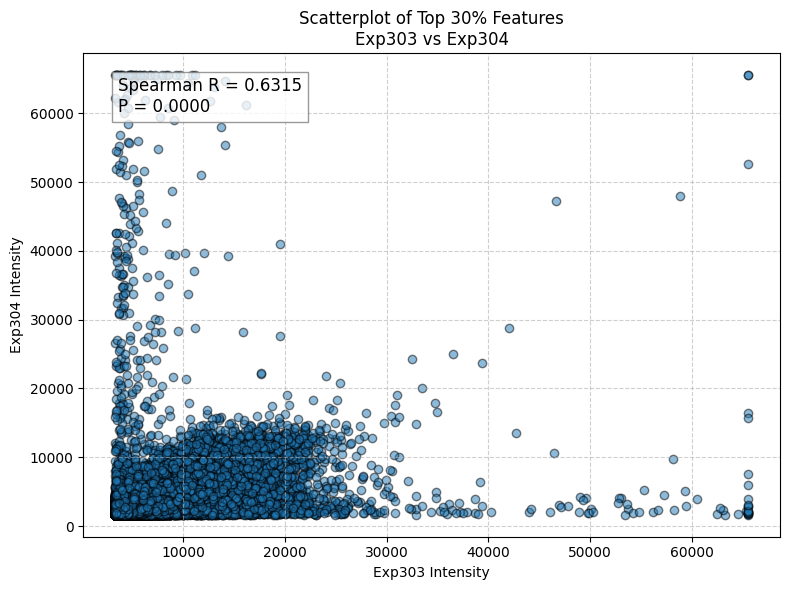

In [8]:
import traceback
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

def calculate_and_visualize_spearman(csv_file, column_names, X):
    try:
        # Read only necessary columns from the CSV file
        df = pd.read_csv(csv_file, usecols=['FeatureNum'] + column_names)
        print("Dataframe loaded successfully.")

        # Find the top X% of features for each column
        for col1, col2 in [(column_names[0], column_names[1])]:
            # Get the thresholds for the top X% for each column
            threshold1 = df[col1].quantile(1 - X / 100)
            threshold2 = df[col2].quantile(1 - X / 100)

            # Filter for the top X% features in each column
            top_X_df1 = df[df[col1] > threshold1]
            top_X_df2 = df[df[col2] > threshold2]

            # Merge the data to align features present in both top X% lists
            merged_df = pd.merge(
                top_X_df1[['FeatureNum', col1]],
                top_X_df2[['FeatureNum', col2]],
                on='FeatureNum',
                how='inner'
            )

            if merged_df.empty:
                print(f"No overlapping features in the top {X}% for {col1} and {col2}.")
            else:
                # Compute Spearman rank correlation
                correlation, p_value = spearmanr(merged_df[col1], merged_df[col2])
                print(f"Spearman Rank Correlation between {col1} and {col2}:")
                print(f"  Correlation: {correlation:.4f}")
                print(f"  P-value: {p_value:.4f}")

                # Scatterplot visualization
                plt.figure(figsize=(8, 6))
                plt.scatter(merged_df[col1], merged_df[col2], alpha=0.5, edgecolors='k')
                plt.title(f'Scatterplot of Top {X}% Features\n{col1} vs {col2}')
                plt.xlabel(f'{col1} Intensity')
                plt.ylabel(f'{col2} Intensity')
                plt.grid(True, linestyle='--', alpha=0.6)
                plt.text(
                    0.05, 0.95,
                    f"Spearman R = {correlation:.4f}\nP = {p_value:.4f}",
                    transform=plt.gca().transAxes,
                    fontsize=12,
                    verticalalignment='top',
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
                )
                plt.tight_layout()
                plt.show()

    except Exception as e:
        print("An error occurred:", e)
        print(traceback.format_exc())


# Implementation:
csv_file_path = "/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/Protein_Comparison/NOD1_analysis/Exp_300_303_304_MedredCombined.csv"
column_names = ['Exp303', 'Exp304']  # Input column names
X = 30  # Input desired top percentage


print("Column Names:", column_names)
calculate_and_visualize_spearman(csv_file_path, column_names, X)


Dataframe loaded successfully.
Spearman Rank Correlation for features below 40000:
  Correlation: 0.6324
  P-value: 0.0000


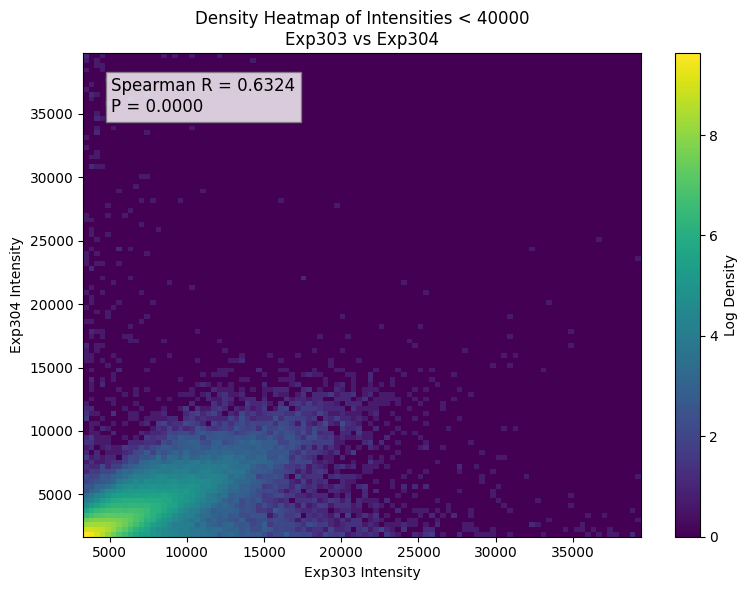

In [13]:
# ADDING HEATMAP, REMOVING >4000 INTENSITY
import numpy as np

def calculate_and_visualize_spearman_heatmap(csv_file, column_names, X, intensity_limit):
    try:
        # Read only necessary columns from the CSV file
        df = pd.read_csv(csv_file, usecols=['FeatureNum'] + column_names)
        print("Dataframe loaded successfully.")

        # Find the top X% of features for each column
        threshold1 = df[column_names[0]].quantile(1 - X / 100)
        threshold2 = df[column_names[1]].quantile(1 - X / 100)

        # Filter for the top X% features in each column
        top_X_df1 = df[df[column_names[0]] > threshold1]
        top_X_df2 = df[df[column_names[1]] > threshold2]

        # Merge the data to align features present in both top X% lists
        merged_df = pd.merge(
            top_X_df1[['FeatureNum', column_names[0]]],
            top_X_df2[['FeatureNum', column_names[1]]],
            on='FeatureNum',
            how='inner'
        )

        # Filter merged data by intensity limit
        filtered_df = merged_df[
            (merged_df[column_names[0]] < intensity_limit) &
            (merged_df[column_names[1]] < intensity_limit)
        ]

        if filtered_df.empty:
            print(f"No overlapping features with intensities below {intensity_limit}.")
            return

        # Compute Spearman rank correlation
        correlation, p_value = spearmanr(filtered_df[column_names[0]], filtered_df[column_names[1]])
        print(f"Spearman Rank Correlation for features below {intensity_limit}:")
        print(f"  Correlation: {correlation:.4f}")
        print(f"  P-value: {p_value:.4f}")

        # Create heatmap of density
        plt.figure(figsize=(8, 6))
        heatmap, xedges, yedges = np.histogram2d(
            filtered_df[column_names[0]],
            filtered_df[column_names[1]],
            bins=100  # Adjust bins for resolution
        )
        plt.imshow(
            np.log1p(heatmap.T),  # Log-transform for better visualization of density
            origin='lower',
            extent=[
                xedges[0], xedges[-1],
                yedges[0], yedges[-1]
            ],
            aspect='auto',
            cmap='viridis'
        )
        plt.colorbar(label='Log Density')
        plt.title(f'Density Heatmap of Intensities < {intensity_limit}\n{column_names[0]} vs {column_names[1]}')
        plt.xlabel(f'{column_names[0]} Intensity')
        plt.ylabel(f'{column_names[1]} Intensity')

        # Annotate Spearman correlation on the heatmap
        plt.text(
            0.05, 0.95,
            f"Spearman R = {correlation:.4f}\nP = {p_value:.4f}",
            transform=plt.gca().transAxes,
            fontsize=12,
            verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
        )
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print("An error occurred:", e)

# Implementation:
csv_file_path = "/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/Protein_Comparison/NOD1_analysis/Exp_300_303_304_MedredCombined.csv"
column_names = ['Exp303', 'Exp304']  # Input column names
X = 30  # Input desired top percentage
intensity_limit = 40000  # Limit to intensities below 4000

calculate_and_visualize_spearman_heatmap(csv_file_path, column_names, X, intensity_limit)


Dataframe loaded successfully.


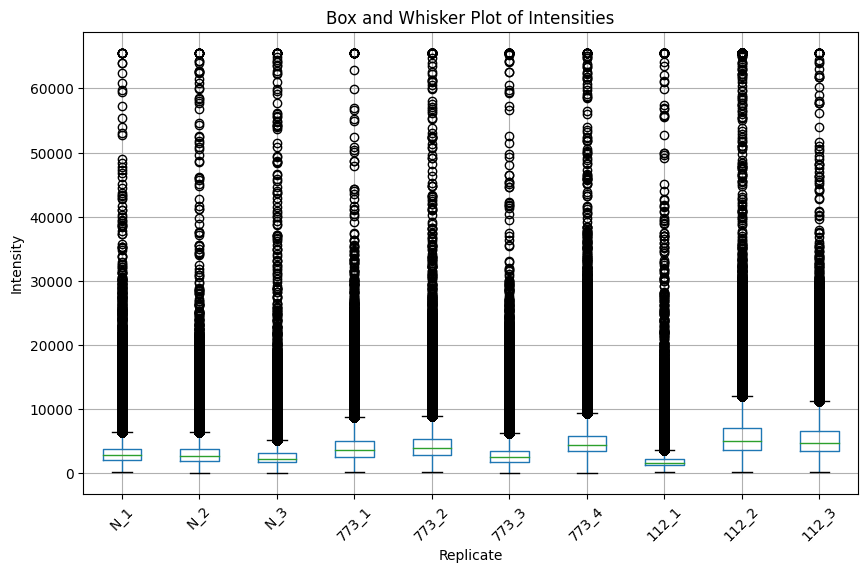

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def plot_box_whisker(csv_file, column_names):
    try:
        # Read only necessary columns from the CSV file
        df2 = pd.read_csv(csv_file, usecols=column_names)
        print("Dataframe loaded successfully.")
        
        # Convert non-numerical columns to numerical
        idx = 0
        for col in column_names:
            if df2[col].dtype == 'object':
                df2[col] = pd.to_numeric(df2[col], errors='coerce')
                print(f"Removed non-numeric data from column {column_names[idx]}")
            idx += 1
        
        # Replace zero values with NaN
        df2.replace(0, np.nan, inplace=True)

        # Drop rows with missing values
        df2.dropna(inplace=True)
        
        # Plot box and whisker plot
        plt.figure(figsize=(10, 6))
        df2.boxplot()
        plt.title('Box and Whisker Plot of Intensities')
        plt.xlabel('Replicate')
        plt.ylabel('Intensity')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print("An error occurred:", e)
        print(traceback.format_exc())

csv_file_path = "/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/Protein Comparison/Master sheet_3_exp.csv"
column_names = ['N_1', 'N_2', 'N_3', '773_1', '773_2', '773_3', '773_4', '112_1', '112_2', '112_3']  

plot_box_whisker(csv_file_path, column_names)


In [6]:
import pandas as pd

def count_data_below_threshold(csv_file, column_names, threshold):
    try:
        # Read only necessary columns from the CSV file
        df3 = pd.read_csv(csv_file, usecols=column_names)
        print("Dataframe loaded successfully.")
        
        for col in column_names:
            # Count the number of values below the threshold
            count_below_threshold = df3[col][df3[col] < threshold].count()
            # Calculate the total count
            total_count = len(df3[col])
            #calculate mean + median
            col_mean = df3[col].mean()
            col_median = df3[col].median()
            # Calculate the percentage of values below the threshold
            percentage_below_threshold = (count_below_threshold / total_count) * 100 if total_count > 0 else 0
            # Print the count and percentage
            print("Total count of values below {}: {} ({}%) in column '{}' with mean {} and median {}".format(threshold, count_below_threshold, round(percentage_below_threshold, 2), col, round(col_mean,1), col_median))
        
    except Exception as e:
        print("An error occurred:", e)
        print(traceback.format_exc())

csv_file_path = "/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/Protein Comparison/Master sheet_3_exp.csv"
column_names = ['N_1', 'N_2', 'N_3', '773_1', '773_2', '773_3', '773_4', '112_1', '112_2', '112_3']  
threshold = 1000  # Input your threshold value here

count_data_below_threshold(csv_file_path, column_names, threshold)


Dataframe loaded successfully.
Total count of values below 1000: 36472 (3.77%) in column 'N_1' with mean 3276.1 and median 2825.0
Total count of values below 1000: 39477 (4.08%) in column 'N_2' with mean 3177.8 and median 2637.0
Total count of values below 1000: 53836 (5.57%) in column 'N_3' with mean 2654.3 and median 2260.0
Total count of values below 1000: 37903 (3.92%) in column '773_1' with mean 4025.5 and median 3566.0
Total count of values below 1000: 29087 (3.01%) in column '773_2' with mean 4340.3 and median 3882.0
Total count of values below 1000: 74041 (7.65%) in column '773_3' with mean 2880.2 and median 2519.0
Total count of values below 1000: 6200 (0.64%) in column '773_4' with mean 4921.5 and median 4485.0
Total count of values below 1000: 88853 (9.19%) in column '112_1' with mean 2000.0 and median 1583.0
Total count of values below 1000: 22705 (2.35%) in column '112_2' with mean 5772.9 and median 5028.0
Total count of values below 1000: 24810 (2.56%) in column '112_3' w

Dataframe loaded successfully.


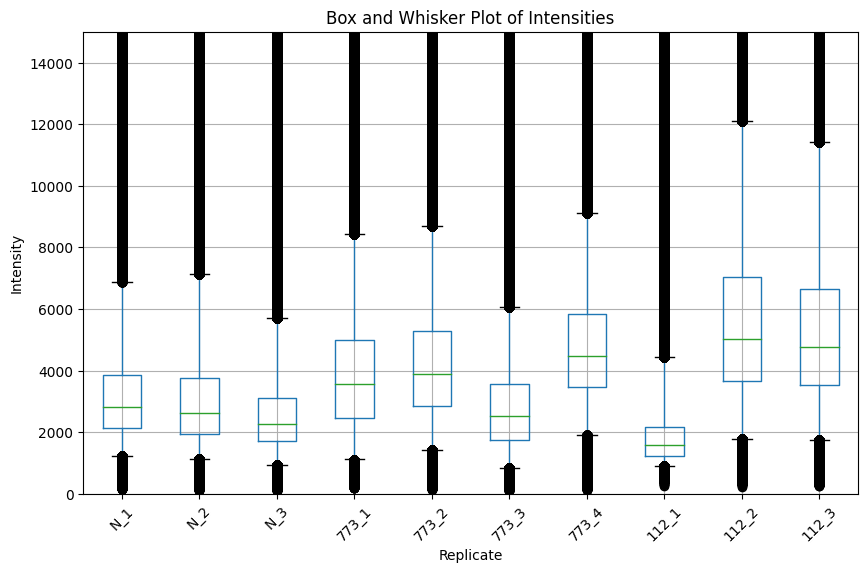

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_box_whisker(csv_file, column_names):
    try:
        # Read only necessary columns from the CSV file
        df = pd.read_csv(csv_file, usecols=column_names)
        print("Dataframe loaded successfully.")
        
        # Convert non-numerical columns to numerical
        for col in column_names:
            if df[col].dtype == 'object':
                df[col] = pd.to_numeric(df[col], errors='coerce')
                print(f"Removed non-numeric data from column {col}")
                
        # Filter values above 30,000
        # df = df[df <= 30000]

        # Plot box and whisker plot
        plt.figure(figsize=(10, 6))
        df.boxplot(whis=[5, 95])
        plt.title('Box and Whisker Plot of Intensities')
        plt.xlabel('Replicate')
        plt.ylabel('Intensity')
        plt.xticks(rotation=45)
        plt.ylim(0, 15000)# Set y-axis limit to 15,000
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print("An error occurred:", e)

csv_file_path = "/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/Protein Comparison/Master sheet_3_exp.csv"
column_names = ['N_1', 'N_2', 'N_3', '773_1', '773_2', '773_3', '773_4', '112_1', '112_2', '112_3']  

plot_box_whisker(csv_file_path, column_names)
